# Introduction to Keras

We will use extensively numpy, pandas, and matplotlib libraries over the lectures.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

### 1 .Recall of the previous notebook

In the previous notebook, we implemented our own logistic regression classifier based using the negative log likelihood loss function and a stochastic gradient descent optimizer

In [2]:
from sklearn.metrics import log_loss


class LogisticRegression:
    
    def __init__(self, learning_rate=0.1, max_iter=100, tol=1e-3,
                 batch_size=20):
        self.learning_rate = learning_rate
        self.max_iter = max_iter
        self.tol = tol
        self.batch_size = batch_size
    
    def _sigmoid(self, X):
        return 1 / (1 + np.exp(-X))
    
    def _decision_function(self, X):
        return np.dot(X, self.coefs_)
    
    def decision_function(self, X):
        X = self._add_intercept(X)
        return self._decision_function(X).ravel()
    
    def _grad_nll(self, X, y):
        grad = (self._predict_proba(X) - y)
        return np.dot(X.T, grad)
    
    def _add_intercept(self, X):
        return np.hstack((X, np.ones(shape=(X.shape[0], 1))))

    def fit(self, X, y):
        X = self._add_intercept(X)
        # Make y to be a column vector for later operation
        y = np.atleast_2d(y).T
        # Initialize randomly the weights
        self.coefs_ = np.random.rand(X.shape[1], 1)
        
        it = 0
        loss = np.inf
        while it < self.max_iter and loss > self.tol:
            # select a minibatch
            idx = np.random.choice(np.arange(X.shape[0]),
                                   size=self.batch_size)
            X_subset, y_subset = X[idx], y[idx]
            # compute the gradient
            dnll = self._grad_nll(X_subset, y_subset)
            # update the parameter
            self.coefs_ -= (self.learning_rate / X_subset.shape[0]) * dnll
            # update the loss and the number of iteration
            loss = log_loss(y, self._predict_proba(X))
            it += 1
        return self
    
    def _predict_proba(self, X):
        return self._sigmoid(self._decision_function(X))
    
    def predict_proba(self, X):
        X = self._add_intercept(X)
        return self._predict_proba(X)

    def predict(self, X):
        prob = self.predict_proba(X)
        prob[prob < 0.5] = 0
        prob[prob >= 0.5] = 1
        return prob.astype(int).ravel()
    
    def score(self, X, y):
        return np.mean(y == self.predict(X))

We should that it was working quite well on a very small dataset

In [3]:
from sklearn.datasets import load_iris
iris = load_iris()
X, y = iris.data, iris.target

In [4]:
X = X[:, :2]

In addition, we will use only the samples corresponding to the class `0` and `1`.

In [5]:
mask_class_0_1 = np.bitwise_or(y == 0, y == 1)

In [6]:
X = X[mask_class_0_1]
y = y[mask_class_0_1]

In [7]:
clf = LogisticRegression(learning_rate=0.1)
clf.fit(X, y).score(X, y)

0.98

### 2. What is Keras?

Keras is an open source neural network library written in Python. Then, what is the relationship between our logistic regression and a neural network. Indeed, a logistic regression is equivalent to a neural network which does not have an hidden layer. Therefore, we will be able to use Keras to implement our logistic regression. In this regard, we will get use to the Keras API. 

Keras will give us all the different tools which we need to create our logistic regression

In [10]:
from keras.models import Sequential
from keras.layers.core import Dense, Activation

In [17]:
model = Sequential()
model.add(Dense(1, input_shape=(X.shape[1],)))
model.add(Activation("sigmoid"))

In [18]:
from keras import optimizers

In [19]:
model.compile(optimizer=optimizers.SGD(lr=0.1),
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [21]:
model.fit(X, y, epochs=10, batch_size=20)

Epoch 1/10
100/100 [==============================] - 0s 159us/step - loss: 0.1469 - acc: 0.9900
Epoch 2/10
100/100 [==============================] - 0s 127us/step - loss: 0.1443 - acc: 0.9900
Epoch 3/10
100/100 [==============================] - 0s 184us/step - loss: 0.1446 - acc: 0.9900
Epoch 4/10
100/100 [==============================] - 0s 92us/step - loss: 0.1460 - acc: 0.9900
Epoch 5/10
100/100 [==============================] - 0s 89us/step - loss: 0.1433 - acc: 0.9900
Epoch 6/10
100/100 [==============================] - 0s 83us/step - loss: 0.1434 - acc: 0.9900
Epoch 7/10
100/100 [==============================] - 0s 217us/step - loss: 0.1418 - acc: 0.9900
Epoch 8/10
100/100 [==============================] - 0s 95us/step - loss: 0.1407 - acc: 0.9900
Epoch 9/10
100/100 [==============================] - 0s 127us/step - loss: 0.1447 - acc: 0.9800
Epoch 10/10
100/100 [==============================] - 0s 182us/step - loss: 0.1392 - acc: 0.9900


In [27]:
from sklearn.metrics import accuracy_score

print('The mean accuracy is: ', 
      accuracy_score(y, model.predict_classes(X)))

The mean accuracy is:  0.99


We can see that Keras will allow us to define simply the architecture of a neural network and will manage the computation of the gradient to optimize the weights of the network. Now that we know the different componenent required by a supervised classifier, we can start to learn more about Keras.

### 3. Training Neural Networks with Keras

Now, we will use the `digits` dataset to train a neural networks using Keras.

In [28]:
from sklearn.datasets import load_digits

digits = load_digits()

#### 3.1 Preprocessing

Before to be used in a classifier, it is preprocess the data. In the following code, we are converting the data into 32 bits precision and standardize the data to have zero mean and a unit standard deviation.

In [36]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

data = np.asarray(digits.data, dtype='float32')
target = np.asarray(digits.target, dtype='int32')

X_train, X_test, y_train, y_test = train_test_split(
    data, target, test_size=0.15, random_state=37)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print(X_train.mean(axis=0))
print(X_train.std(axis=0))

[ 0.00000000e+00 -4.56695695e-08 -1.51841562e-08  1.74481176e-08
 -8.97777852e-09 -8.78260964e-10  1.26859918e-08 -2.74261396e-07
 -6.74504435e-08 -1.00180301e-07 -2.73236744e-09 -2.21712106e-08
 -1.60819340e-08 -4.62160443e-08 -2.67772009e-08 -3.52943800e-07
  6.47912657e-08 -3.55500518e-08  8.35323810e-09  1.47547841e-08
  1.26469581e-08 -9.68038734e-08  1.43644465e-08 -5.97227199e-07
 -3.76237246e-08 -9.98289984e-09 -5.79261901e-08  1.17101462e-09
 -1.21258566e-07 -5.72235805e-08 -1.32168523e-07  8.33738000e-07
  0.00000000e+00  2.63868625e-08  3.59111141e-08  4.37178791e-08
  3.47596192e-08 -5.85507323e-08 -5.03536279e-09  0.00000000e+00
 -2.17120757e-07  6.39276436e-08 -3.02902450e-08 -9.69600080e-08
  1.40521754e-08 -4.61379770e-08  4.53182665e-08  2.40321469e-07
 -1.63810313e-07 -3.12270571e-10 -2.46693741e-08 -1.03829967e-08
  4.88459477e-08 -9.68038805e-09  1.44425139e-08 -6.71967229e-08
  2.31616930e-08  5.04316979e-08 -2.82019350e-08 -1.33378563e-07
 -1.35057023e-08 -2.40448

Let's display the one of the transformed sample (after feature standardization):

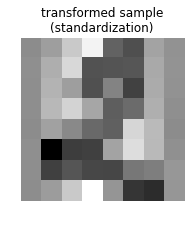

In [34]:
sample_index = 45
plt.figure(figsize=(3, 3))
plt.imshow(X_train[sample_index].reshape(8, 8),
           cmap=plt.cm.gray_r, interpolation='nearest')
plt.axis('off')
plt.title("transformed sample\n(standardization)");

The scaler objects makes it possible to recover the original sample:

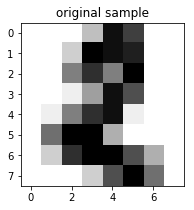

In [37]:
plt.figure(figsize=(3, 3))
plt.imshow(scaler.inverse_transform(X_train[sample_index]).reshape(8, 8),
           cmap=plt.cm.gray_r, interpolation='nearest')
plt.title("original sample");

In [38]:
print(X_train.shape, y_train.shape)

(1527, 64) (1527,)


In [39]:
print(X_test.shape, y_test.shape)

(270, 64) (270,)


#### 3.2 Feed-forward neural network with Keras

Objectives of this section:

- Build and train a first feedforward network using `Keras`
    - https://keras.io/getting-started/sequential-model-guide/
- Experiment with different optimizers, activations, size of layers, initializations

#### 3.2.1 Keras Workflow

To build a first neural network we need to turn the target variable into a vector "one-hot-encoding" representation. Here are the labels of the first samples in the training set encoded as integers:

In [40]:
y_train[:3]

array([2, 9, 5], dtype=int32)

Keras provides a utility function to convert integer-encoded categorical variables as one-hot encoded values:

In [41]:
import keras
from keras.utils.np_utils import to_categorical

Y_train = to_categorical(y_train)
Y_train[:3]

array([[0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]], dtype=float32)

We can now build an train a our first feed forward neural network using the high level API from keras:

- first we define the model by stacking layers with the right dimensions
- then we define a loss function and plug the SGD optimizer
- then we feed the model the training data for fixed number of epochs

In [42]:
from keras.models import Sequential
from keras.layers.core import Dense, Activation
from keras import optimizers

N = X_train.shape[1]
H = 100
K = 10

model = Sequential()
model.add(Dense(H, input_dim=N))
model.add(Activation("tanh"))
model.add(Dense(K))
model.add(Activation("softmax"))

model.compile(optimizer=optimizers.SGD(lr=10),
              loss='categorical_crossentropy', metrics=['accuracy'])

model.fit(X_train, Y_train, epochs=15, batch_size=32);

Epoch 1/15
1527/1527 [==============================] - 0s 253us/step - loss: 5.7545 - acc: 0.5900
Epoch 2/15
1527/1527 [==============================] - 0s 43us/step - loss: 4.9310 - acc: 0.6654
Epoch 3/15
1527/1527 [==============================] - 0s 72us/step - loss: 4.4924 - acc: 0.7033
Epoch 4/15
1527/1527 [==============================] - 0s 64us/step - loss: 4.3799 - acc: 0.7138
Epoch 5/15
1527/1527 [==============================] - 0s 61us/step - loss: 4.2891 - acc: 0.7217
Epoch 6/15
1527/1527 [==============================] - 0s 77us/step - loss: 4.1740 - acc: 0.7197
Epoch 7/15
1527/1527 [==============================] - 0s 68us/step - loss: 4.1771 - acc: 0.7210
Epoch 8/15
1527/1527 [==============================] - 0s 67us/step - loss: 3.9379 - acc: 0.7459
Epoch 9/15
1527/1527 [==============================] - 0s 69us/step - loss: 4.0556 - acc: 0.7380
Epoch 10/15
1527/1527 [==============================] - 0s 67us/step - loss: 3.9861 - acc: 0.7394
Epoch 11/15
1527/1

#### 3.2.2 Exercises: Impact of the Optimizer

- Try to decrease the learning rate value by 10 or 100. What do you observe?

- Try to increase the learning rate value to make the optimization diverge.

- Configure the SGD optimizer to enable a Nesterov momentum of 0.9
  
Note that the keras API documentation is available at:

https://keras.io/

It is also possible to learn more about the parameters of a class by using the question mark: type and evaluate:

```python
optimizers.SGD?
```

in a jupyter notebook cell.

In [13]:
model = Sequential()
model.add(Dense(H, input_dim=N))
model.add(Activation("tanh"))
model.add(Dense(K))
model.add(Activation("softmax"))

optimizer = optimizers.SGD(lr=0.1, momentum=0.9, nesterov=True)
model.compile(optimizer=optimizer, loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(X_train, Y_train, epochs=15, batch_size=32)


# Analysis:
#
# Setting the learning rate value to a small value (e.g. lr=0.001 on
# this dataset) makes the model train much slower (it has not
# converged yet after 15 epochs).
#
# Using momentum tends to mitigate the small learning rate / slow
# training problem a bit.
#
# Setting the learning rate to a very large value (e.g. lr=10)
# makes the model randomly bounce around a good local
# minimum and therefore prevent it to reach a low training loss even
# after 30 epochs.


Epoch 1/15
1527/1527 [==============================] - 1s 424us/step - loss: 0.3950 - acc: 0.8847
Epoch 2/15
1527/1527 [==============================] - 0s 170us/step - loss: 0.0777 - acc: 0.9771
Epoch 3/15
1527/1527 [==============================] - 0s 182us/step - loss: 0.0338 - acc: 0.9928
Epoch 4/15
1527/1527 [==============================] - 0s 173us/step - loss: 0.0186 - acc: 0.9974
Epoch 5/15
1527/1527 [==============================] - 0s 163us/step - loss: 0.0103 - acc: 0.9993
Epoch 6/15
1527/1527 [==============================] - 0s 178us/step - loss: 0.0077 - acc: 1.0000
Epoch 7/15
1527/1527 [==============================] - 0s 183us/step - loss: 0.0057 - acc: 1.0000
Epoch 8/15
1527/1527 [==============================] - 0s 218us/step - loss: 0.0046 - acc: 1.0000
Epoch 9/15
1527/1527 [==============================] - 0s 313us/step - loss: 0.0041 - acc: 1.0000
Epoch 10/15
1527/1527 [==============================] - 0s 317us/step - loss: 0.0036 - acc: 1.0000
Epoch 11/

- Replace the SGD optimizer by the Adam optimizer from keras and run it
  with the default parameters.

- Add another hidden layer and use the "Rectified Linear Unit" for each
  hidden layer. Can you still train the model with Adam with its default global
  learning rate?

- Bonus: try the Adadelta optimizer (no learning rate to set).

Hint: use `optimizers.<TAB>` to tab-complete the list of implemented optimizers in Keras.

In [43]:
model = Sequential()
model.add(Dense(H, input_dim=N))
model.add(Activation("relu"))
model.add(Dense(H))
model.add(Activation("relu"))
model.add(Dense(K))
model.add(Activation("softmax"))
model.compile(optimizer="adam", loss='categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, Y_train, epochs=15, batch_size=32)

# Analysis:
#
# Adam with its default global learning rate of 0.001 tends to work
# in many settings often converge as fast or faster than SGD
# with a well tuned learning rate.
#
# Adadelta has no learning rate setting at all
#
# References:
#
# Adadelta: https://arxiv.org/abs/1212.5701
# Adam:     https://arxiv.org/abs/1412.6980


Epoch 1/15
1527/1527 [==============================] - 1s 430us/step - loss: 1.3709 - acc: 0.6457
Epoch 2/15
1527/1527 [==============================] - 0s 134us/step - loss: 0.3797 - acc: 0.9155
Epoch 3/15
1527/1527 [==============================] - 0s 102us/step - loss: 0.1808 - acc: 0.9620
Epoch 4/15
1527/1527 [==============================] - 0s 96us/step - loss: 0.1087 - acc: 0.9804
Epoch 5/15
1527/1527 [==============================] - 0s 87us/step - loss: 0.0740 - acc: 0.9889
Epoch 6/15
1527/1527 [==============================] - 0s 109us/step - loss: 0.0517 - acc: 0.9921
Epoch 7/15
1527/1527 [==============================] - 0s 139us/step - loss: 0.0388 - acc: 0.9967
Epoch 8/15
1527/1527 [==============================] - 0s 121us/step - loss: 0.0278 - acc: 0.9980
Epoch 9/15
1527/1527 [==============================] - 0s 147us/step - loss: 0.0210 - acc: 0.9993
Epoch 10/15
1527/1527 [==============================] - 0s 217us/step - loss: 0.0162 - acc: 1.0000
Epoch 11/15

#### 3.2.3 Exercises: forward pass and generalization

- Compute predictions on test set using `model.predict_classes(...)`
- Compute average accuracy of the model on the test set

test acc: 0.9778


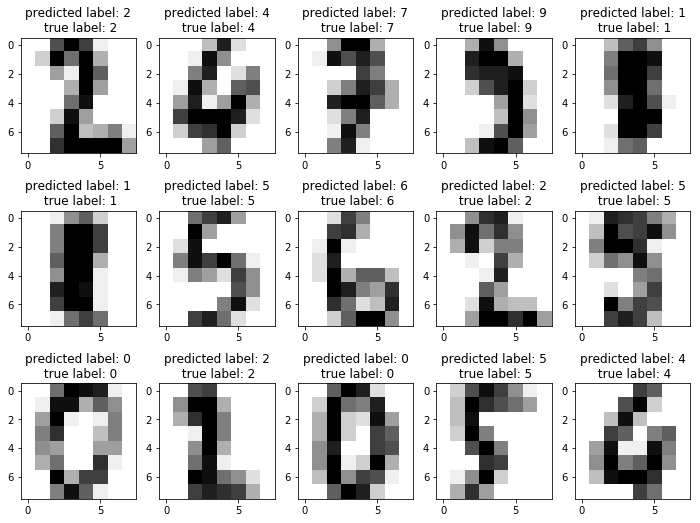

In [17]:
y_predicted = model.predict_classes(X_test, verbose=0)

# Let's display the first inputs image, the predicted labels and the true labels
plt.figure(figsize=(12, 9))
for i in range(15):
    plt.subplot(3, 5, i + 1)
    plt.imshow(scaler.inverse_transform(X_test[i]).reshape(8, 8),
               cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title("predicted label: %d\n true label: %d"
              % (y_predicted[i], y_test[i]))
    
print("test acc: %0.4f" % np.mean(y_predicted == y_test))